In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
import pathlib

In [2]:
import os
base_dir = 'C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [3]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,           # normalisasi data
                    horizontal_flip=True,     # data dapat berputar balik secara horizontal                  
                    ) 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    color_mode= 'rgb', 
                                                    shuffle= True
                                                    )
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  target_size=(224, 224),
                                                  color_mode= 'rgb', 
                                                  shuffle= True
                                                  )

Found 25430 images belonging to 11 classes.
Found 6363 images belonging to 11 classes.


In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, 
                                                               weights= "imagenet", 
                                                               input_shape= (224, 224, 3), 
                                                               pooling= 'max')

In [10]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),                                                # layer input untuk deep learning neural network 
    tf.keras.layers.Dense(11, activation= 'softmax')                                 # output layer 3 class
])

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 dense_6 (Dense)             (None, 256)               393472    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 11)                2827      
                                                                 
Total params: 11,179,834
Trainable params: 11,092,531
Non-trainable params: 87,303
_________________________________________________________________


In [12]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [13]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
            print("\nAkurasi telah mencapai >90%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [14]:
history=model.fit(
      train_generator,
      steps_per_epoch=4,                    
      epochs=25,                            
      validation_data=test_generator,       
      verbose=2,
      validation_steps=4,             
      callbacks = [callbacks]
      )

Epoch 1/25
4/4 - 157s - loss: 8.5416 - accuracy: 0.1328 - val_loss: 2.8289 - val_accuracy: 0.0859 - 157s/epoch - 39s/step
Epoch 2/25
4/4 - 115s - loss: 3.5388 - accuracy: 0.2695 - val_loss: 2.7705 - val_accuracy: 0.0703 - 115s/epoch - 29s/step
Epoch 3/25
4/4 - 115s - loss: 1.9905 - accuracy: 0.3672 - val_loss: 2.7034 - val_accuracy: 0.0664 - 115s/epoch - 29s/step
Epoch 4/25
4/4 - 115s - loss: 1.6431 - accuracy: 0.4492 - val_loss: 2.6807 - val_accuracy: 0.0508 - 115s/epoch - 29s/step
Epoch 5/25
4/4 - 113s - loss: 1.4690 - accuracy: 0.4727 - val_loss: 2.5694 - val_accuracy: 0.0703 - 113s/epoch - 28s/step
Epoch 6/25
4/4 - 113s - loss: 1.1099 - accuracy: 0.6367 - val_loss: 2.6703 - val_accuracy: 0.0469 - 113s/epoch - 28s/step
Epoch 7/25
4/4 - 115s - loss: 1.1175 - accuracy: 0.6367 - val_loss: 2.6164 - val_accuracy: 0.0742 - 115s/epoch - 29s/step
Epoch 8/25
4/4 - 113s - loss: 0.8646 - accuracy: 0.7070 - val_loss: 2.5759 - val_accuracy: 0.0820 - 113s/epoch - 28s/step
Epoch 9/25
4/4 - 112s - 

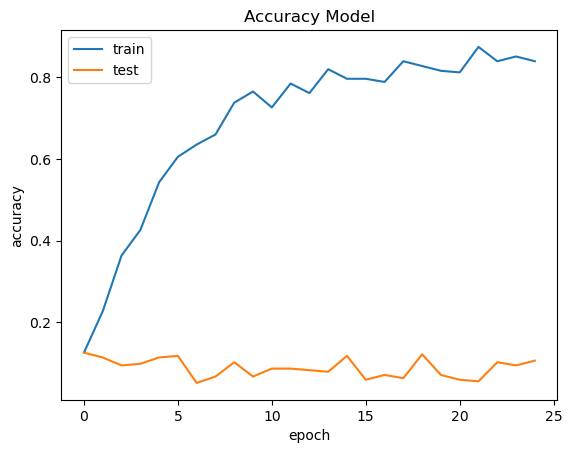

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()